In [2]:
# Please first create a path 'training/' and upload the dataset 'nycu2023mlfinalproject.zip' and the trained model 'trained_model.h5' under the path training/.
!apt-get install p7zip-full
!7z x training/nycu2023mlfinalproject.zip -o/content/training

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 367884417 bytes (351 MiB)

Extracting archive: training/nycu2023mlfinalproject.zip
 34% 4096 Open              --
Path = training/nycu2023mlfinalproject.zip
Type = zip
Physical Size = 367884417

  0%      2% 292          4% 567 - data/test/9lhy1fknyaf3jan9.jpg                                           6% 791 - data/test/e1p9br1tql9h550z.jpg

In [1]:
# Optional: Mount Google Drive instead of uploading
from google.colab import drive
drive.mount('/content/drive')
import os
dir_path = 'training'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
!cp "/content/drive/MyDrive/Colab Notebooks/nycu2023mlfinalproject.zip" "/content/training/nycu2023mlfinalproject.zip"
!cp "/content/drive/MyDrive/Colab Notebooks/trained_model_batch512_lr025_epoch50.h5" "/content/training/trained_model.h5"

Mounted at /content/drive


# 1. Load the Trained Model

In [9]:
from tensorflow.keras.models import load_model
model_path = 'training/trained_modelEpo15-17.h5'
model = load_model(model_path)

# 2. Use load_test_images to Load Test Data

In [10]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import sys
sys.path.append('training')

def load_test_images(sample_submission_path, test_images_directory):
    sample_submission = pd.read_csv(sample_submission_path)
    images = []
    ids = sample_submission['id'].tolist()
    for img_id in ids:
        img_path = os.path.join(test_images_directory, img_id + '.jpg')
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images), ids

sample_submission_path = 'training/data/sample_submission.csv'
test_images_directory = 'training/data/test'

test_images, test_ids = load_test_images(sample_submission_path, test_images_directory)

# 3. Make Predictions on the Test Data

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_dir = 'training/data/train'
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=128,
                                                    class_mode='categorical')

predictions = model.predict(test_images, batch_size=32)
predicted_classes = np.argmax(predictions, axis=1)
class_indices_dict = train_generator.class_indices
class_indices_dict = {v: k for k, v in train_generator.class_indices.items()}
predicted_class_names = [class_indices_dict[k] for k in predicted_classes]



Found 9788 images belonging to 200 classes.
63/63 [==============================] - 6s 50ms/step


# 4. Display the Images and Predictions Using display_test_images

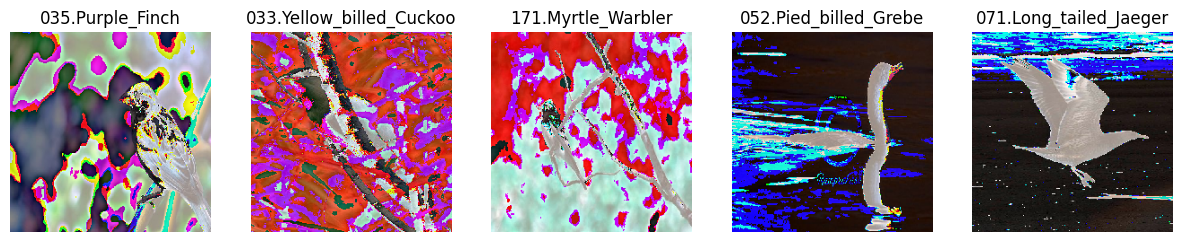

In [12]:
def display_test_images(images, ids, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].astype('uint8'))
        plt.title(ids[i])
        plt.axis('off')
    plt.show()

display_test_images(test_images, predicted_class_names, num_images=5)

# 5. Save the Submission File

In [13]:
import pandas as pd

submission_df = pd.DataFrame({
    'id': test_ids,
    'label': predicted_class_names
})

submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

# Appendix: Train Model

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%cd training
!touch __init__.py
!python train.py
%cd ..

/content/training
2024-01-05 05:59:47.876741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 05:59:47.876800: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 05:59:47.878395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Found 9710 images belonging to 200 classes.
Found 4817 images belonging to 200 classes.
Epoch 1/30
I0000 00:00:1704434414.077643    7423 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
37/37 [==============================] - ETA: 0s - loss: 3.5788 - accuracy: 0.2330 - precisi

In [6]:
!cp "/content/training/training/model-14-0.95.h5" "/content/drive/MyDrive/Colab Notebooks/model-14-0.95.h5"

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%cd training
!python fine_tune.py
%cd ..

/content/training
2024-01-05 06:53:26.368934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 06:53:26.369004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 06:53:26.371110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Found 9710 images belonging to 200 classes.
Found 4817 images belonging to 200 classes.
Epoch 1/3
I0000 00:00:1704437629.524086   21132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
37/37 [==============================] - 174s 4s/step - loss: 0.1187 - accuracy: 0.9811 - pre

In [14]:
!cp "/content/training/trained_modelEpo15-17.h5" "/content/drive/MyDrive/Colab Notebooks/trained_modelEpo15-17.h5"